In [35]:
# importing the necessary packages

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

Data Exploration and Cleaning

In [12]:
stock_count = 0
etf_count = 0

stock_lst = []
etf_lst = []

empty_stocks_file = []
empty_etf_file = []

# Counting files and also appending the datasets 
def count_files(foldername, txt_file_count, total_lst, empty_files):
    for dirname, _, filenames in os.walk(foldername):

        for filename in filenames:

            # detecting with the files end with .txt
            try:
                if filename.endswith('.txt'):
                    company_ticker = filename.split('.')[0]
                    # Reading the filenames 
                    txt_df = pd.read_csv(os.path.join(dirname, filename), delimiter=',')

                    # Appending the ticker symbol to each dataframe
                    txt_df['symbol'] = company_ticker

                    total_lst.append(txt_df)

                    # Tracking total number of legitimate files
                    txt_file_count += 1

            # Detecting files that are empty 
            except Exception as e:
                empty_stocks_file.append(company_ticker)

                

    return txt_file_count

# Pathname to reading the dataset 
stock_folder_path = '/Users/melvinleo/Downloads/Stock Market Dataset/Stocks'
etf_folder_path = '/Users/melvinleo/Downloads/Stock Market Dataset/ETFs'

stock_count = count_files(stock_folder_path, stock_count, stock_lst, empty_stocks_file)
etf_count = count_files(etf_folder_path, etf_count, etf_lst, empty_etf_file)

# Combining the dataset 
stocks_df = pd.concat(stock_lst, ignore_index=True)
etf_df = pd.concat(etf_lst, ignore_index=True)


print(f"Total number of stock files: {stock_count}")
print(f"Total number of etf files: {etf_count}")

print(f"Total number of empty stock files: {len(empty_stocks_file)}")
print(f"Total number of empty etf files: {len(empty_etf_file)}")


Total number of stock files: 7163
Total number of etf files: 1344
Total number of etf files: 32
Total number of etf files: 0


In [17]:
# Analyzing the dataset in total

print(stocks_df.dtypes)
print(stocks_df.describe())
print(stocks_df.shape)

# Seems like under OpenINT its all 0s

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
symbol      object
dtype: object
               Open          High           Low         Close        Volume  \
count  1.488766e+07  1.488766e+07  1.488766e+07  1.488766e+07  1.488766e+07   
mean   3.038538e+04  3.121247e+04  2.936176e+04  3.024522e+04  1.585730e+06   
std    4.202501e+06  4.323486e+06  4.046981e+06  4.180590e+06  7.635187e+06   
min    0.000000e+00  4.000000e-03 -1.000000e+00  3.700000e-03  0.000000e+00   
25%    7.750000e+00  7.884000e+00  7.610000e+00  7.750000e+00  3.280000e+04   
50%    1.568000e+01  1.591900e+01  1.543100e+01  1.568000e+01  1.922660e+05   
75%    2.890000e+01  2.927900e+01  2.850000e+01  2.889990e+01  8.917860e+05   
max    1.423713e+09  1.442049e+09  1.362118e+09  1.437986e+09  2.423735e+09   

          OpenInt  
count  14887665.0  
mean          0.0  
std           0.0  
min           0.0  
25%           0.0  
50

In [18]:
# Checking for null values
stocks_df.isnull().sum()


Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
symbol     0
dtype: int64

In [20]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df.head(10)

,Date,Open,High,Low,Close,Volume,OpenInt,symbol
0,2005-02-25,12.868,12.982,12.834,12.834,15928,0,iba
1,2005-02-28,13.536,13.536,13.273,13.281,16382,0,iba
2,2005-03-01,13.185,13.299,13.185,13.299,1250,0,iba
3,2005-03-02,13.361,13.395,13.273,13.291,8760,0,iba
4,2005-03-03,13.361,13.404,12.966,13.218,9897,0,iba
5,2005-03-04,13.307,13.536,13.228,13.404,11491,0,iba
6,2005-03-07,13.578,13.578,13.273,13.273,6827,0,iba
7,2005-03-08,13.342,13.342,13.228,13.228,2162,0,iba
8,2005-03-09,13.237,13.324,13.237,13.273,6144,0,iba
9,2005-03-10,13.218,13.218,13.203,13.210,6487,0,iba


Data Analysis 

In [32]:
stocks_df.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
symbol             object
Year                int32
dtype: object

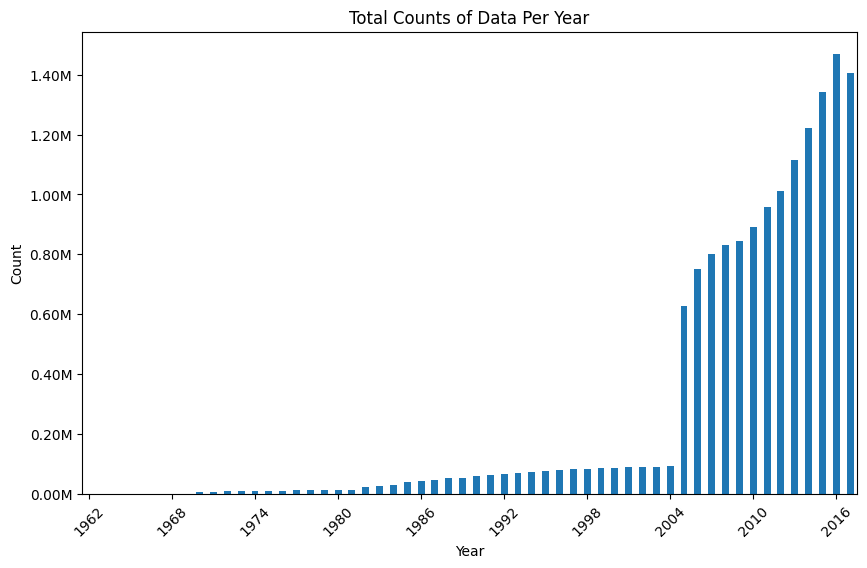

In [37]:
stocks_df['Year'] = stocks_df['Date'].dt.year

yearly_counts = stocks_df.groupby('Year').size()

# Plot a bar chart
ax = yearly_counts.plot(kind='bar', figsize=(10, 6), title='Total Counts of Data Per Year')

plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}M'.format(x * 1e-6)))
ax.xaxis.set_major_locator(MaxNLocator(nbins=len(yearly_counts)//5)) 


# Show the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

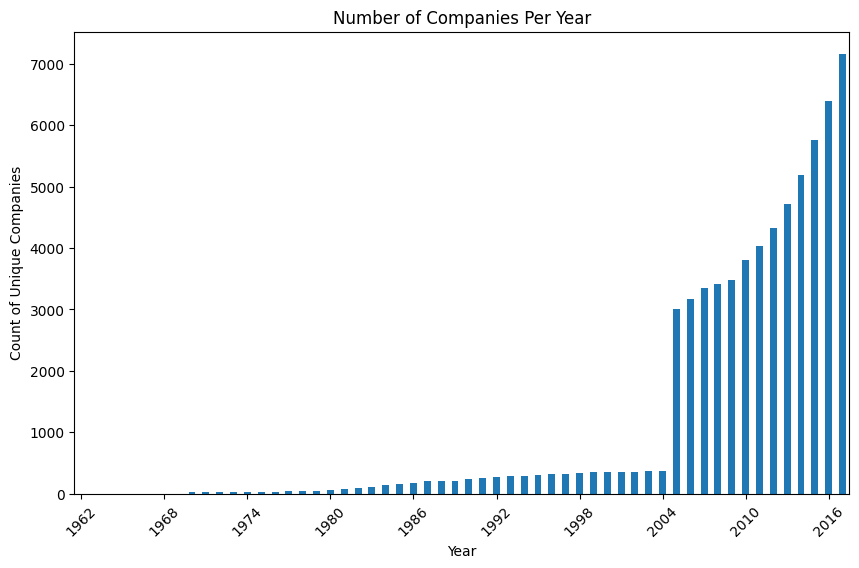

In [39]:
companies_per_year = stocks_df.groupby('Year')['symbol'].nunique()
ac = companies_per_year.plot(kind='bar', figsize=(10, 6), title='Number of Unique Companies Per Year')
ac.xaxis.set_major_locator(MaxNLocator(nbins=len(yearly_counts)//5)) 

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count of Unique Companies')
plt.show()

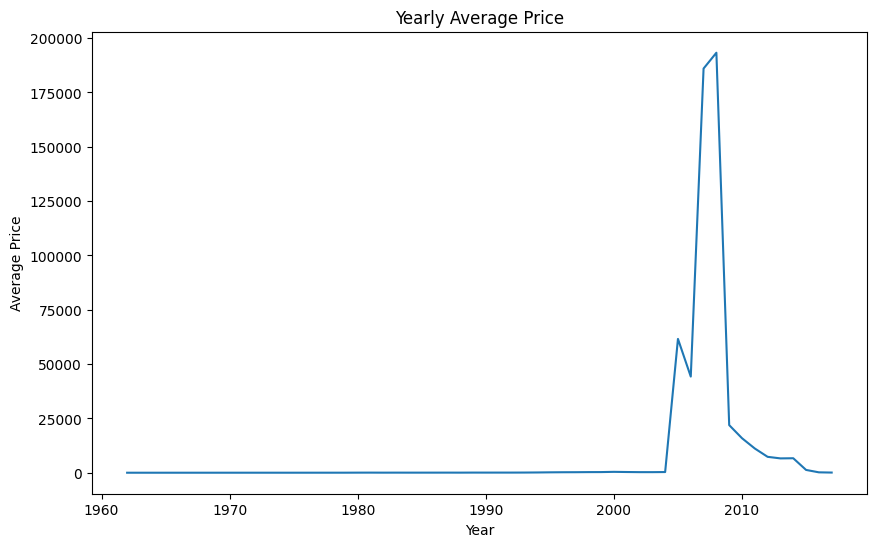

In [40]:
yearly_avg_price = stocks_df.groupby(stocks_df['Year'])['Close'].mean()
yearly_avg_price.plot(kind='line', figsize=(10, 6), title='Yearly Average Price')


plt.xlabel('Year')
plt.ylabel('Average Price')

# Show the plot
plt.show()

# Average of stock's closing prices every year
# how the stock performed during that year which smooth out daily fluctuations (overall trend in price movements)

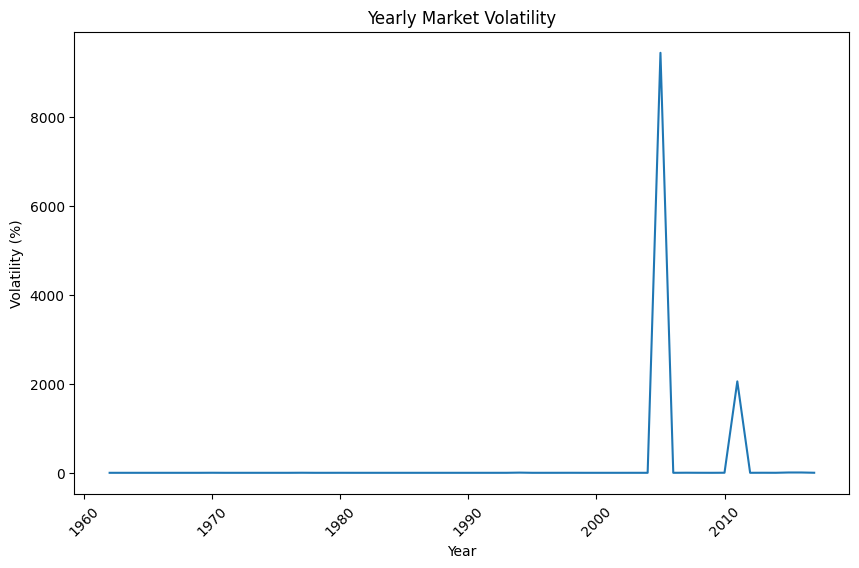

In [43]:
stocks_df['daily_return'] = stocks_df['Close'].pct_change()

yearly_volatility = stocks_df.groupby(stocks_df['Year'])['daily_return'].std() 

# Plot the yearly volatility
plt.figure(figsize=(10, 6))
yearly_volatility.plot(kind='line', title='Yearly Market Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Interpolation here 